# Warehouse Indexes assessment
*This notebook illustrates how to assess the product portfolio of a storage system by analysing the indexes.  
*Use the virtual environment logproj.yml to run this notebook.*
***
Alessandro Tufano 2020

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

#import utilities
from logproj.utilities import creaCartella

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from logproj.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,LOGICAL_WH2,AREA 1,1,0,0,0,0,0,0
0,1,LOGICAL_WH1,AREA 1,2,0,0,1200,0,0,1
0,1,FAKE,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH1,AREA 1,4,0,0,3600,0,0,3
0,1,LOGICAL_WH2,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,47.507196,7.137242
0,1,PRODOTTO_1,24.603251,7.450183
0,2,PRODOTTO_2,79.361282,0.188242
0,3,PRODOTTO_3,36.681612,8.108993
0,4,PRODOTTO_4,86.384400,2.034342


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,40,1,LOGICAL_WH1,AREA 1,730,2,13,4,8000,10400,4800,65,65,5.230156,376.273899,2.026914,2020-01-02 01:00:40.923960,-,PUTAWAY
0,64,1,LOGICAL_WH1,AREA 1,983,2,64,2,8000,51200,2400,267,267,6.916819,416.253409,47.174136,2020-01-02 01:24:00.924025,-,PICKING
0,50,1,LOGICAL_WH2,AREA 1,944,2,56,3,8000,44800,3600,551,551,5.967158,426.125781,7.368668,2020-01-02 01:34:11.094116,+,PICKING
0,91,1,FAKE,AREA 1,235,0,46,4,0,36800,4800,109,109,2.140082,104.404091,4.346610,2020-01-02 01:50:07.106607,,PUTAWAY
0,12,1,FAKE,AREA 1,1126,3,27,0,12000,21600,0,567,567,2.792643,204.718910,22.298033,2020-01-02 02:06:25.077439,-,OTHER


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,FAKE,0,100,12.777023,2020-01-02
0,1,FAKE,1,841,36.709936,2020-01-02
0,1,FAKE,2,941,1.969664,2020-01-02
0,1,LOGICAL_WH1,3,1244,3.224482,2020-01-02
0,1,LOGICAL_WH2,4,1599,2.834614,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
_, root_path = creaCartella(pathResults,f"{string_casestudy}_results")
_, path_results = creaCartella(root_path,f"P8_warehouseAssessment")

Cartella TOY_DATA_results già esistente
Cartella P8_warehouseAssessment già esistente


### Set columns name

In [9]:
# %% SET COLUMNS MOVEMENTS
timecolumn_mov='TIMESTAMP_IN'
itemcodeColumns_mov='ITEMCODE'
inout_column_mov = 'INOUT'
x_col_mov = 'LOCCODEX'
y_col_mov = 'LOCCODEY'
z_col_mov = 'LOCCODEZ'

In [10]:
# %% SET COLUMNS SKUS
itemcodeColumns_sku='ITEMCODE'

In [11]:
# %% SET COLUMNS INVENTORY
itemcodeColumns_inv = 'ITEMCODE'

### Generate the inventory curve for each SKU

In [12]:
# generate the inventory curve for each SKU
from logproj.information_framework import updatePartInventory
D_SKUs= updatePartInventory(D_SKUs,D_movements,D_inventory,timecolumn_mov,itemcodeColumns_sku,itemcodeColumns_mov,itemcodeColumns_inv) 


..\logproj\information_framework.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT'] = D_movements['INOUT'].astype(str) + D_movements[quantityColums].astype(str)
..\logproj\information_framework.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT']=D_movements['MOVEMENT'].astype(float)
..\logproj\information_framework.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [13]:
#print SKUs master file dataframe with inventory curve
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT,INVENTORY_QTY,INVENTORY_DAYS
0,0,PRODOTTO_0,47.507196,7.137242,"[12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 12.77702286611617, 23.0503582897327, 23.0503582897327, 69.31545996699592, 69.31545996699592, 69.31545996699592, 69.31545996699592, 69.31545996699592, 69.31545996699592, 69.31545996699592, 69.31545996699592, 74.42868447954584, 67.42991731029022, 67.42991731029022, 67.42991731029022, 67.42991731029022, 48.13067605315155, 48.13067605315155, 48.13067605315155, 48.13067605315155, 50.87861181895769, 50.87861181895769, 62.536838008202324, 62.536838008202324, 62.536838008202324, 62.536838008202324, 62.536838008202324, 62.536838008202324, 62.536838008202324, 62.536838008202324, 62.536838008202324]","[2020-002, 2020-003, 2020-004, 2020-005, 2020-006, 2020-007, 2020-008, 2020-009, 2020-010, 2020-011, 2020-012, 2020-013, 2020-014, 2020-015, 2020-016, 2020-017, 2020-018, 2020-019, 2020-020, 2020-021, 2020-022, 2020-023, 2020-024, 2020-025, 2020-026, 2020-027, 2020-028, 2020-029, 2020-030, 2020-031, 2020-032, 2020-033, 2020-034, 2020-035, 2020-036, 2020-037, 2020-038, 2020-039, 2020-040, 2020-041, 2020-042, 2020-043]"
1,1,PRODOTTO_1,24.603251,7.450183,"[36.7099355147255, 36.7099355147255, 46.83527171035794, 46.83527171035794, 46.83527171035794, 46.83527171035794, 46.83527171035794, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 51.16254087099637, 90.11867876541132, 90.11867876541132, 84.77486401122832, 84.77486401122832, 84.77486401122832, 84.77486401122832, 38.13521106185019, 38.13521106185019, 38.13521106185019, 38.13521106185019, 38.13521106185019, 38.13521106185019, 38.13521106185019, 87.07510028531976, 87.07510028531976, 96.33113192884568, 96.33113192884568, 96.33113192884568]","[2020-002, 2020-003, 2020-004, 2020-005, 2020-006, 2020-007, 2020-008, 2020-009, 2020-010, 2020-011, 2020-012, 2020-013, 2020-014, 2020-015, 2020-016, 2020-017, 2020-018, 2020-019, 2020-020, 2020-021, 2020-022, 2020-023, 2020-024, 2020-025, 2020-026, 2020-027, 2020-028, 2020-029, 2020-030, 2020-031, 2020-032, 2020-033, 2020-034, 2020-035, 2020-036, 2020-037, 2020-038, 2020-039, 2020-040, 2020-041, 2020-042, 2020-043]"
2,2,PRODOTTO_2,79.361282,0.188242,"[1.9696639340358002, 1.9696639340358002, 1.9696639340358002, 1.9696639340358002, 21.125108338472423, 21.125108338472423, 21.125108338472423, 21.125108338472423, 8.63164245554217, 8.63164245554217, 8.63164245554217, 8.63164245554217, 9.470291832466799, 9.470291832466799, 1.9696639340358002, 1.9696639340358002, 16.05139292083231, 16.05139292083231, 22.103576015841355, 22.103576015841355, 22.103576015841355, 22.103576015841355, 22.103576015841355, 22.103576015841355, 15.055785125070155, 15.055785125070155, 15.055785125070155, 15.055785125070155, 15.055785125070155, 15.055785125070155, 15.055785125070155, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753, 20.15930234212753]","[2020-002, 2020-003, 2020-004, 2020-005, 2020-006, 2020-007, 2020-008, 2020-009, 2020-010, 2020-011, 2020-012, 2020-013, 2020-014, 2020-015, 2020-016, 2020-017, 2020-018, 2020-019, 2020-020, 2020-021, 2020-022, 2020-023, 2020-024, 2020-025, 2020-026, 2020-027, 2020-028, 2020-029, 2020-030, 2020-031, 2020-032, 2020-033, 2020-034, 2020-035, 2020-036, 2020-037, 2020-038, 2020-039, 2020-040, 2020-041, 2020-042, 2020-043]"
3,3,PRODOTTO_3,36.681612,8.108993,"[3.224481837660792, 3.224481837660792, 3.224481837660792, 3.224481837660792, 3.224481837660792, 3.2244

### Calculate the popularity index

Cartella SKUs indices già esistente


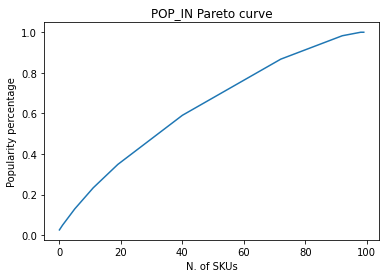

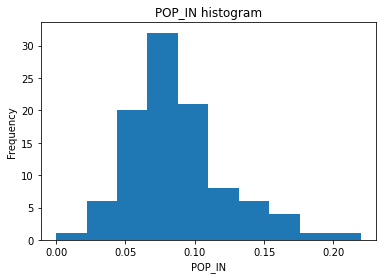

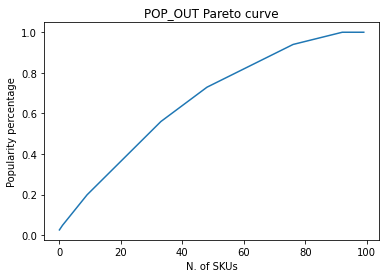

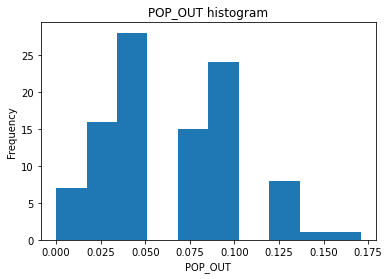

In [15]:
# %% POPULARITY INDEX

_, path_current = creaCartella(path_results,f"SKUs indices")

from logproj.P8_performanceAssessment.wh_indexes import updatePopularity, whIndexParetoPlot


D_SKUs = updatePopularity(D_SKUs)

#POPULARITY IN
output_figures = whIndexParetoPlot(D_SKUs,'POP_IN')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png")  
        
#POPULARITY OUT
output_figures = whIndexParetoPlot(D_SKUs,'POP_OUT')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png")  

### Calculate the order completion (OC) index

C:\Users\aletu\.conda\envs\test\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


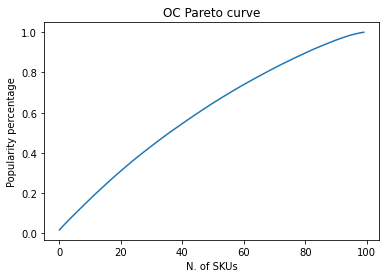

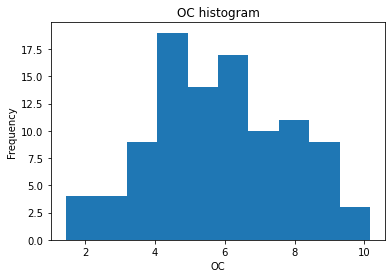

In [17]:
# %% ORDER COMPLETION INDEX
from logproj.P8_performanceAssessment.wh_indexes import updateOrderCompletion
D_SKUs = updateOrderCompletion(D_SKUs, D_movements)

#OC
output_figures = whIndexParetoPlot(D_SKUs,'OC')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 


### Calculate the Cube-per-order index (COI)

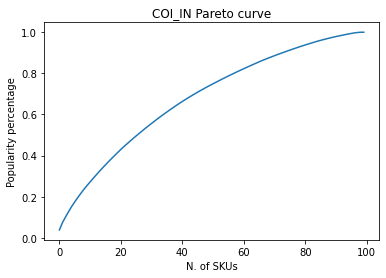

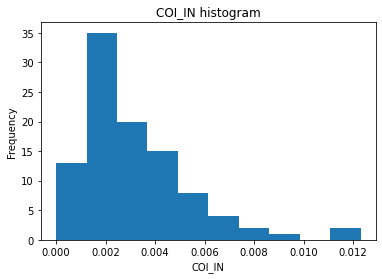

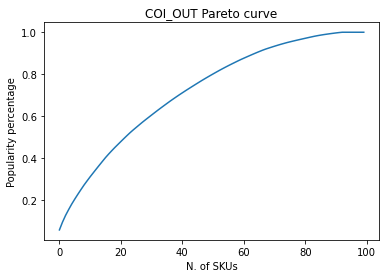

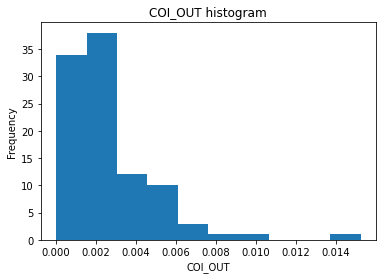

In [19]:
# %% COI INDEX
from logproj.P8_performanceAssessment.wh_indexes import updateCOI
D_SKUs = updateCOI(D_SKUs)

#COI IN
output_figures = whIndexParetoPlot(D_SKUs,'COI_IN')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 
        
#COI OUT
output_figures = whIndexParetoPlot(D_SKUs,'COI_OUT')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 



### Calculate the TURN index

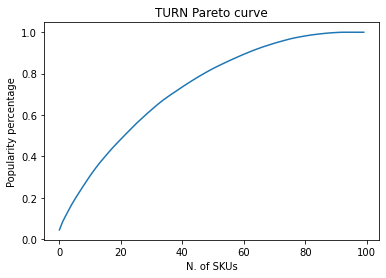

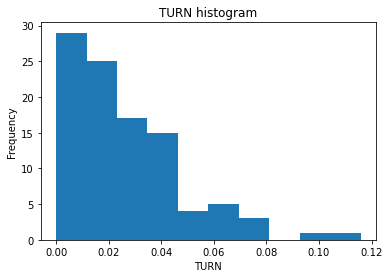

In [20]:
# %% TURN INDEX
from logproj.P8_performanceAssessment.wh_indexes import updateTURN
D_SKUs = updateTURN(D_SKUs)

#COI IN
output_figures = whIndexParetoPlot(D_SKUs,'TURN')

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 

### Calculate the inventory parameters

In [24]:
# %% INVENTORY PARAMETERS

from logproj.information_framework import updateInventoryParams
D_SKUs = updateInventoryParams(D_SKUs)

C:\Users\aletu\.conda\envs\test\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\aletu\.conda\envs\test\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\aletu\.conda\envs\test\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\aletu\.conda\envs\test\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\aletu\.conda\envs\test\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Calculate the interarrival time

In [25]:
# %% INTERARRIVAL TIME
from logproj.information_framework import updateInterarrivalTime
D_SKUs = updateInterarrivalTime(D_SKUs)




### Calculate the Fourier transform of the inventory curve

In [27]:
# %% INTERARRIVAL TIME
from logproj.P8_performanceAssessment.wh_indexes import updateFourieranalysis
D_SKUs = updateFourieranalysis(D_SKUs)

..\logproj\stat_time_series.py:344: RuntimeWarning: divide by zero encountered in true_divide
  weeks=1/xf


### Save the SKU table with parameters

In [28]:
# %% save sku table
D_SKUs.to_excel(path_current+"\\SKUs.xlsx")